In [1]:
# Importing packages...

import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Importing the dataset.

# https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
df = pd.read_csv('heart.csv')

In [3]:
# Checking everything was imported ok.
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# This project is divided in four parts:
# 1 - Introduction
# 2 - Data Exploration
# 3 - Model Building
# 4 - Conclusion

In [5]:
# 1 - Introduction

# Heart diseases are perennially the leading cause death worlwide. Therefore, it is useful to be able to predict
# at risk people given their current health condition. The dataset used in this project consists of patient data such
# as age and sex, but also exam results such as cholesterol level fetched via BMI sensor. The end goal of the project
# is to develop a machine learning model to predict at risk people from the patient data that will serve as input.
# Since the ouput variable is whether or not the patient has a high chance of having a heart attack, it is a 
# categorical (binary) output. For datasets with that characteristic, Classification Models are useful. Throughout the
# project I will look at three models: Logistic Regression, K-Nearest Neighbor and Classification Trees. For each one
# I will look their at effectiveness and evaluate which one produces the best results.

In [6]:
# 1 - Introduction

# Independent Variables:
# age - Age of the patient
# sex - Sex of the patient
# cp - Chest pain type: 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic 
# trtbps - Resting blood pressure (in mm Hg)
# chol - Cholesterol in mg/dl fetched via BMI sensor
# fbs - fasting blood sugar > 120 mg/dl: 0 = False, 1 = True
# restecg - Resting ecg results: 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
# thalachh - Maximum heart rate achieved
# exng - Exercise induced angina: 0 = No, 1 = Yes
# oldpeak - Previous peak
# slp - Slope of the peak exercise ST segment 
# caa - Number of major vessels (0-3)
# thall - Thalium Stress Test Results

# Dependent Variables:
# output - 0 = Less chance of heart attack, 1 = Greater chance of heart attack

In [7]:
# 2 - Data Exploration

# Checking the datatypes.
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [8]:
# 2 - Data Exploration

# There are 14 variables. 13 input variables and 1 output.

# age - numerical
# sex - categorical (binary)
# exang - categorical (binary)
# cp - categorical
# trtbps - numerical
# chol - numerical
# fbs - categorical (binary)
# restecg - categorical
# thalachh - numerical
# exng - categorical (binary)
# oldpeak - numerical
# slp - categorical
# caa - categorical
# thall - categorical
# output - categorical (binary)

# As we can see there are categorical and numerical variables. The output variable is categorical (binary).

In [9]:
# 2 - Data Exploration

# Descriptive statistics to have a feel for possible outliers and incorrect input.
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# 2 - Data Exploration

# Taking a look at the size of the dataset.
df.shape

# 303 rows and 14 columns.

(303, 14)

In [11]:
# 2 - Data Exploration

# Missing data handling by dropping rows with a blank column.
df.dropna()

# As we can see from the output, no row was removed, as size is still (303, 14)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
# Checking if the categorical variables are within the domain of the definitions set by the dataset owner. If a row is
# not within the domain it is dropped.
df.drop(df[df['cp'] > 3].index, inplace = True)
df.drop(df[df['cp'] < 0].index, inplace = True)
df.drop(df[df['fbs'] > 1].index, inplace = True)
df.drop(df[df['fbs'] < 0].index, inplace = True)
df.drop(df[df['restecg'] > 1].index, inplace = True)
df.drop(df[df['restecg'] < 0].index, inplace = True)
df.drop(df[df['caa'] > 3].index, inplace = True)
df.drop(df[df['caa'] < 0].index, inplace = True)
df.drop(df[df['output'] > 1].index, inplace = True)
df.drop(df[df['output'] < 0].index, inplace = True)


# This time 9 rows were dropped.
df.shape

(294, 14)

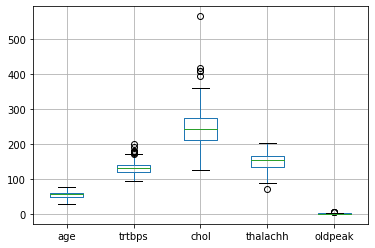

In [13]:
# 2 - Data Exploration

# Boxplot to take a look at possible numerical variable outliers that might be input errors. The only candidate would
# be the cholesterol value over 500, but after a quick research we find out it is a possible value.
df.boxplot(column = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'])

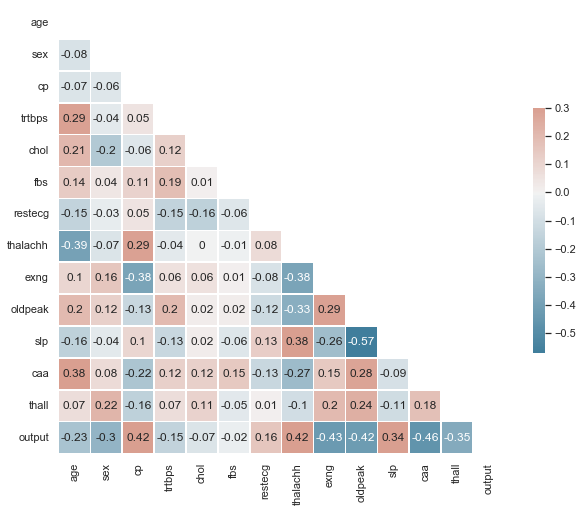

In [14]:
# 2 - Data Exploration

# Correlation Matrix to better understand the relationships between the variables.
corrMatrix = df.corr().round(2)

sns.set_theme(style="white")
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
f, ax = plt.subplots(figsize=(10, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corrMatrix, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# I've plotted both numerical and categorical variables together as I belive there are interesting relationships 
# between different types of data. The last line shows us how the input variables interact with the output variable.

In [15]:
# 3 - Model Building

# Splitting x and y variables.
x_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 
             'caa', 'thall']
x = df[x_columns]
y = df.output

In [16]:
# 3 - Model Building

# Data Normalization applied to the x variables for computational efficiency.
norm = preprocessing.normalize(x, axis = 0)
x = pd.DataFrame(norm, columns=x.columns)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.066612,0.070535,0.123718,0.063766,0.053913,0.150756,0.000000,0.057732,0.000000,0.087038,0.000000,0.0,0.024347
1,0.039121,0.070535,0.082479,0.057170,0.057847,0.000000,0.082199,0.071973,0.000000,0.132448,0.000000,0.0,0.048694
2,0.043351,0.000000,0.041239,0.057170,0.047203,0.000000,0.000000,0.066200,0.000000,0.052979,0.076084,0.0,0.048694
3,0.059211,0.070535,0.041239,0.052772,0.054607,0.000000,0.082199,0.068509,0.000000,0.030274,0.076084,0.0,0.048694
4,0.060268,0.000000,0.000000,0.052772,0.081911,0.000000,0.082199,0.062736,0.102062,0.022705,0.076084,0.0,0.048694


In [17]:
# 3 - Model Building

# Splitting x and y into Training Data and Testing Data. 70% will be Training Data and 30% Testing Data.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state = 1234)

In [18]:
# 3 - Model Building

# Logistic Regression

# Building a Logistic Regression model based on the x and y values of the Training Data
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

# Applying the created model now using the x values of the Testing Data, and storing the predicted values for y.
y_pred=logreg.predict(x_test)

Text(0.5, 257.44, 'Predicted Outcomes')

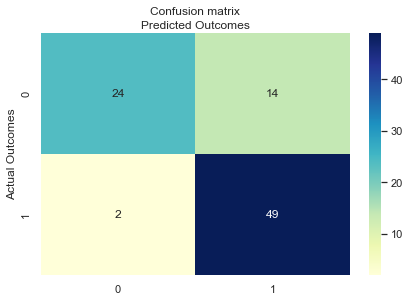

In [19]:
# 3 - Model Building

# Logistic Regression

# Confusion Matrix

# Now that the model has made its predictions, we can compare its results with the actual outcomes that we have stored
# on the y variables of the Testing Data.
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Outcomes')
plt.xlabel('Predicted Outcomes')

# Using a Confusion Matrix we can observe how the model did in terms of overall predictions, as well as how it fared
# predicting cases of heart attack and cases of no heart attack.

In [20]:
# 3 - Model Building

# Logistic Regression
logistic_accuracy = metrics.accuracy_score(y_test, y_pred)
logistic_precision = metrics.precision_score(y_test, y_pred)
logistic_recall = metrics.recall_score(y_test, y_pred)
logistic_f1 = 2 * ((logistic_precision*logistic_recall)/(logistic_precision+logistic_recall))

print("Accuracy:",logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:",logistic_recall)
print("F1 Score:",logistic_f1)

# Here aided by the Confusion Matrix we can calculate the overall prediction rate (Accuracy). Precision refers to how
# effective the model is in predicting cases of heart attack, conversely Recall calculates the effectiveness of 
# predicting events of no heart attacks. Lastly, F1 Score gives a balanced look at predicting ouputs of 0 and 1.

Accuracy: 0.8202247191011236
Precision: 0.7777777777777778
Recall: 0.9607843137254902
F1 Score: 0.8596491228070176


In [21]:
# 3 - Model Building

# K-Nearest Neighbors

# Similarly to Logistic Regression we build the K-Nn model based on the x and y values of the Training Data.
# Initially we will see the effectiveness of the model with a Nearest Neighbor number of 5.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
# 3 - Model Building

# K-Nearest Neighbors

# Applying the created model now using the x values of the Testing Data, and storing the predicted values for y.
y_pred = classifier.predict(x_test)

Text(0.5, 257.44, 'Predicted label')

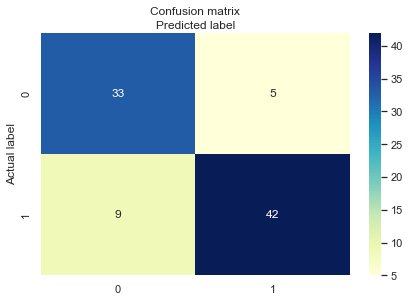

In [23]:
# 3 - Model Building

# K-Nearest Neighbors

# Now creating a Confusion Matrix for the results of the K-Nn model.
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
# 3 - Model Building

# K-Nearest Neighbors

# Accuracy, Precision, Recall and F1 Scores for the K-Nn Model with k = 5 (Number of Nearest Neighbors)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = 2 * ((precision*recall)/(precision+recall))

print("Accuracy:",accuracy)
print("Precision:", precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.8426966292134831
Precision: 0.8936170212765957
Recall: 0.8235294117647058
F1 Score: 0.8571428571428571


Text(0, 0.5, 'Error Rate')

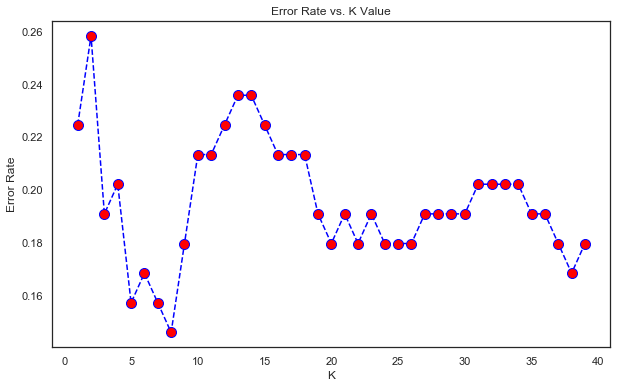

In [25]:
# 3 - Model Building

# K-Nearest Neighbors

# Before moving on and trying another model. I want to take a look at the results of the K-Nn model with different k
# values.
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# The graph below looks specifically at the Accuracy for the K-Nn model with varying values of k. But knowing the
# context of the data we are analyzing, I am of the opinion that the overall prediction rate of the model (Accuracy),
# is not the most important metric in question. For the context of the model I will be prioritizing the Recall metric
# (more on why I prioritized Recall, in the conclusion part of the project). Therefore, I will be testing and
# comparing the Recall for the 5 k values that showed the best Accuracy (5, 6, 7, 8, 9).

In [26]:
# 3 - Model Building

# K-Nearest Neighbors

# Running through the K-Nn model with k values from 5 to 9.
for i in range (5,10):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    precision = metrics.precision_score(y_test, y_pred)
    print(i, precision)
    
# From the results we find that k = 8 has the best Precision. It was also the one with the best Accuracy.

5 0.8936170212765957
6 0.9090909090909091
7 0.8936170212765957
8 0.9130434782608695
9 0.8301886792452831


Text(0.5, 257.44, 'Predicted label')

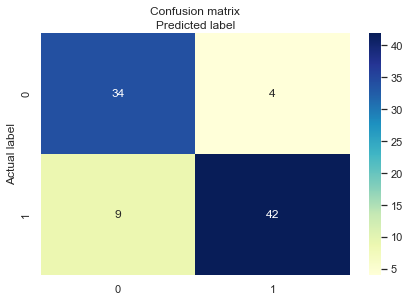

In [27]:
# 3 - Model Building

# K-Nearest Neighbors

# Running the model with 8 Nearest Neighbors.
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Creating the Confusion Matrix for it.
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
# 3 - Model Building

# K-Nearest Neighbors

# Accuracy, Precision, Recall and F1 Scores for the K-Nn Model with k = 8 (Number of Nearest Neighbors).
knn_accuracy = metrics.accuracy_score(y_test, y_pred)
knn_precision = metrics.precision_score(y_test, y_pred)
knn_recall = metrics.recall_score(y_test, y_pred)
knn_f1 = 2 * ((knn_precision*knn_recall)/(knn_precision+knn_recall))

print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

Accuracy: 0.8539325842696629
Precision: 0.9130434782608695
Recall: 0.8235294117647058
F1 Score: 0.865979381443299


In [29]:
# 3 - Model Building

# Classification Tree

# Building a Classification Tree model based on the x and y values of the Training Data.
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

# Applying the created model now using the x values of the Testing Data, and storing the predicted values for y.
y_pred = clf.predict(x_test)

Text(0.5, 257.44, 'Predicted label')

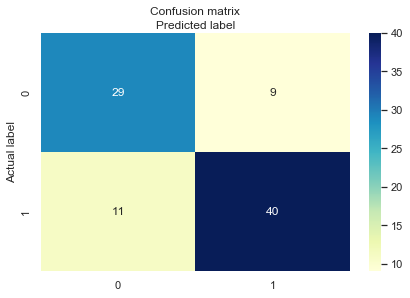

In [30]:
# 3 - Model Building

# Classification Tree

# Now creating a Confusion Matrix for the results of the Classification Tree model.
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
# 3 - Model Building

# Classification Tree

# Accuracy, Precision, Recall and F1 Scores for the Classification Tree Model.
tree_accuracy = metrics.accuracy_score(y_test, y_pred)
tree_precision = metrics.precision_score(y_test, y_pred)
tree_recall = metrics.recall_score(y_test, y_pred)
tree_f1 = 2 * ((tree_precision*tree_recall)/(tree_precision+tree_recall))

print("Accuracy:",accuracy)
print("Precision:", precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.8426966292134831
Precision: 0.8301886792452831
Recall: 0.8235294117647058
F1 Score: 0.8571428571428571


In [32]:
# 4 - Conclusion

# Below are the results for each of the 3 models:
log_reg = [logistic_accuracy, logistic_precision, logistic_recall, logistic_f1]
knn = [knn_accuracy, knn_precision, knn_recall, knn_f1]
tree = [tree_accuracy, tree_precision, tree_recall, tree_f1]

pd.DataFrame(data=[log_reg, knn, tree],
             index=['Logistic Regression', 'K-Nearest Neighbor', 'Classification Tree'],
             columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.820225,0.777778,0.960784,0.859649
K-Nearest Neighbor,0.853933,0.913043,0.823529,0.865979
Classification Tree,0.775281,0.816327,0.784314,0.800000


In [33]:
# 4 - Conclusion

# As we can see above the K-Nearest Neighbor had the highest Accuracy, Precision and F1 Score. Which means it is the 
# best model at overall predicion (Accuracy) and for predicting positives (Precision). But, as I touched on when
# choosing the number of nearest neighbors, for this project I am more interested in the error rate when predicting
# negatives (Recall). In this case predicting a negative is saying that the patient does not have a high probability
# of suffering a heart attack. Therefore, a false negative, predicting that a patient is safe and doesn't have to
# worry too much about their current health condition when in fact they are at risk (Predict 0, Actual 1), is to me
# the most important prediction in the model. When we look at Recall, Logistic Regression has by far the best result.

# In conclusion, K-Nn Model has the best overall results, but Logistic Regression is not that far behind on Accuracy,
# and is miles ahead on Recall. I am willing to sacrifice a little Precision for more Recall, which is why I would
# recommend the use of the Logistic Regression model.